<a href="https://colab.research.google.com/github/Manideep-0503/RF-drone-detection-using-lstm-model/blob/main/singlevariable_lstm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


***generating linear sequence of the angle.***

---



In [2]:
x=[i for i in range(0,360,12)]
print(x)

[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 192, 204, 216, 228, 240, 252, 264, 276, 288, 300, 312, 324, 336, 348]


In [3]:
X=[]
for i in range(len(x) - 2):
    sample = x[i:i+3]
    X.append(sample)

X_array = np.array(X)

print(len(X_array))
X_array=X_array.reshape(28,3,1)
print(X_array.shape)
print(X_array)

28
(28, 3, 1)
[[[  0]
  [ 12]
  [ 24]]

 [[ 12]
  [ 24]
  [ 36]]

 [[ 24]
  [ 36]
  [ 48]]

 [[ 36]
  [ 48]
  [ 60]]

 [[ 48]
  [ 60]
  [ 72]]

 [[ 60]
  [ 72]
  [ 84]]

 [[ 72]
  [ 84]
  [ 96]]

 [[ 84]
  [ 96]
  [108]]

 [[ 96]
  [108]
  [120]]

 [[108]
  [120]
  [132]]

 [[120]
  [132]
  [144]]

 [[132]
  [144]
  [156]]

 [[144]
  [156]
  [168]]

 [[156]
  [168]
  [180]]

 [[168]
  [180]
  [192]]

 [[180]
  [192]
  [204]]

 [[192]
  [204]
  [216]]

 [[204]
  [216]
  [228]]

 [[216]
  [228]
  [240]]

 [[228]
  [240]
  [252]]

 [[240]
  [252]
  [264]]

 [[252]
  [264]
  [276]]

 [[264]
  [276]
  [288]]

 [[276]
  [288]
  [300]]

 [[288]
  [300]
  [312]]

 [[300]
  [312]
  [324]]

 [[312]
  [324]
  [336]]

 [[324]
  [336]
  [348]]]


In [4]:
y=np.array([X_array[i+1,2,0] for i in range(X_array.shape[0]-1)])
y=np.append(y,360)
print(y)

[ 36  48  60  72  84  96 108 120 132 144 156 168 180 192 204 216 228 240
 252 264 276 288 300 312 324 336 348 360]


In [5]:
split_index=int(len(X_array) * 0.8)

X_train = X_array[:split_index]
X_test = X_array[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

In [6]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[[  0]
  [ 12]
  [ 24]]

 [[ 12]
  [ 24]
  [ 36]]

 [[ 24]
  [ 36]
  [ 48]]

 [[ 36]
  [ 48]
  [ 60]]

 [[ 48]
  [ 60]
  [ 72]]

 [[ 60]
  [ 72]
  [ 84]]

 [[ 72]
  [ 84]
  [ 96]]

 [[ 84]
  [ 96]
  [108]]

 [[ 96]
  [108]
  [120]]

 [[108]
  [120]
  [132]]

 [[120]
  [132]
  [144]]

 [[132]
  [144]
  [156]]

 [[144]
  [156]
  [168]]

 [[156]
  [168]
  [180]]

 [[168]
  [180]
  [192]]

 [[180]
  [192]
  [204]]

 [[192]
  [204]
  [216]]

 [[204]
  [216]
  [228]]

 [[216]
  [228]
  [240]]

 [[228]
  [240]
  [252]]

 [[240]
  [252]
  [264]]

 [[252]
  [264]
  [276]]]
[[[264]
  [276]
  [288]]

 [[276]
  [288]
  [300]]

 [[288]
  [300]
  [312]]

 [[300]
  [312]
  [324]]

 [[312]
  [324]
  [336]]

 [[324]
  [336]
  [348]]]
[ 36  48  60  72  84  96 108 120 132 144 156 168 180 192 204 216 228 240
 252 264 276 288]
[300 312 324 336 348 360]


In [7]:
pip install tensorflow

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [9]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 21257.9316 - val_loss: 71082.6094
Epoch 2/1000
1/1 [==============================] - 0s 39ms/step - loss: 20583.0371 - val_loss: 68458.0078
Epoch 3/1000
1/1 [==============================] - 0s 41ms/step - loss: 19864.4570 - val_loss: 65269.8008
Epoch 4/1000
1/1 [==============================] - 0s 41ms/step - loss: 19139.0996 - val_loss: 62027.3555
Epoch 5/1000
1/1 [==============================] - 0s 63ms/step - loss: 18472.3594 - val_loss: 59409.2422
Epoch 6/1000
1/1 [==============================] - 0s 39ms/step - loss: 17889.3867 - val_loss: 57275.8008
Epoch 7/1000
1/1 [==============================] - 0s 41ms/step - loss: 17371.0215 - val_loss: 55500.3984
Epoch 8/1000
1/1 [==============================] - 0s 38ms/step - loss: 16902.6973 - val_loss: 53969.1641
Epoch 9/1000
1/1 [==============================] - 0s 39ms/step - loss: 16469.5195 - val_loss: 52636.1055
Epoch 10/1000
1/1 [====================

In [11]:
test_predictions = model.predict(X_test).flatten()
print(X_test)
print(test_predictions)
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

1/1 [==============================] - 0s 197ms/step
[[[264]
  [276]
  [288]]

 [[276]
  [288]
  [300]]

 [[288]
  [300]
  [312]]

 [[300]
  [312]
  [324]]

 [[312]
  [324]
  [336]]

 [[324]
  [336]
  [348]]]
[302.0077  314.49863 327.01102 339.5382  352.0749  364.61688]


,Test Predictions,Actuals
0,302.007690,300
1,314.498627,312
2,327.011017,324
3,339.538208,336
4,352.074890,348
5,364.616882,360


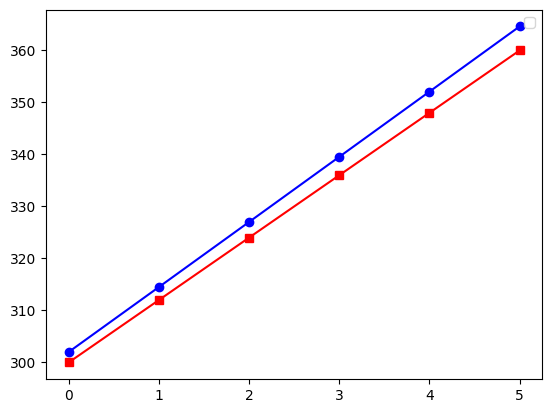

In [12]:
plt.plot(test_results['Test Predictions'],color='blue',marker='o')
plt.plot(test_results['Actuals'],color='red',marker='s')
plt.legend()

In [13]:
model1 = Sequential()
model1.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(3, 1)))
model1.add(LSTM(100, activation='relu', return_sequences=True))
model1.add(LSTM(50, activation='relu', return_sequences=True))
model1.add(LSTM(25, activation='relu'))
model1.add(Dense(20, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 3, 200)            161600    
                                                                 
 lstm_2 (LSTM)               (None, 3, 100)            120400    
                                                                 
 lstm_3 (LSTM)               (None, 3, 50)             30200     
                                                                 
 lstm_4 (LSTM)               (None, 25)                7600      
                                                                 
 dense_1 (Dense)             (None, 20)                520       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                

In [14]:
history = model1.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 20904.2168 - val_loss: 69986.7031
Epoch 2/1000
1/1 [==============================] - 0s 51ms/step - loss: 20880.6992 - val_loss: 69961.8828
Epoch 3/1000
1/1 [==============================] - 0s 52ms/step - loss: 20875.8398 - val_loss: 69937.6719
Epoch 4/1000
1/1 [==============================] - 0s 64ms/step - loss: 20867.5938 - val_loss: 69916.8594
Epoch 5/1000
1/1 [==============================] - 0s 56ms/step - loss: 20862.3770 - val_loss: 69869.3594
Epoch 6/1000
1/1 [==============================] - 0s 50ms/step - loss: 20849.2949 - val_loss: 69829.8750
Epoch 7/1000
1/1 [==============================] - 0s 60ms/step - loss: 20834.4746 - val_loss: 69814.9375
Epoch 8/1000
1/1 [==============================] - 0s 57ms/step - loss: 20814.7773 - val_loss: 69813.9219
Epoch 9/1000
1/1 [==============================] - 0s 55ms/step - loss: 20792.4043 - val_loss: 69679.1406
Epoch 10/1000
1/1 [====================

In [15]:
test_predictions1 = model1.predict(X_test).flatten()
print(X_test)
print(test_predictions1)
test_results1 = pd.DataFrame(data={'Test Predictions':test_predictions1, 'Actuals':y_test})
test_results1

1/1 [==============================] - 1s 852ms/step
[[[264]
  [276]
  [288]]

 [[276]
  [288]
  [300]]

 [[288]
  [300]
  [312]]

 [[300]
  [312]
  [324]]

 [[312]
  [324]
  [336]]

 [[324]
  [336]
  [348]]]
[301.1811  313.5309  325.91922 338.34442 350.80453 363.29807]


,Test Predictions,Actuals
0,301.181091,300
1,313.530914,312
2,325.919220,324
3,338.344421,336
4,350.804535,348
5,363.298065,360


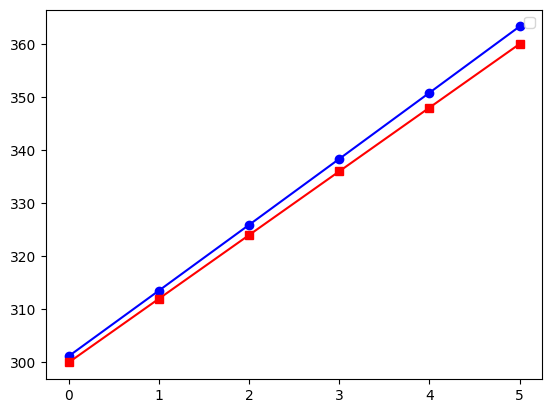

In [16]:
plt.plot(test_results1['Test Predictions'],color='blue',marker='o')
plt.plot(test_results1['Actuals'],color='red',marker='s')
plt.legend()

In [17]:
from keras.layers import Bidirectional

model2 = Sequential()
model2.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(3, 1)))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 100)               20800     
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20901 (81.64 KB)
Trainable params: 20901 (81.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
history = model2.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 23627.5352 - val_loss: 79708.9531
Epoch 2/1000
1/1 [==============================] - 0s 40ms/step - loss: 23062.4863 - val_loss: 77266.8828
Epoch 3/1000
1/1 [==============================] - 0s 38ms/step - loss: 22476.3535 - val_loss: 74719.6406
Epoch 4/1000
1/1 [==============================] - 0s 38ms/step - loss: 21874.0039 - val_loss: 72155.3906
Epoch 5/1000
1/1 [==============================] - 0s 46ms/step - loss: 21256.4219 - val_loss: 69578.8750
Epoch 6/1000
1/1 [==============================] - 0s 40ms/step - loss: 20621.6211 - val_loss: 66907.6875
Epoch 7/1000
1/1 [==============================] - 0s 40ms/step - loss: 19972.2051 - val_loss: 64165.6055
Epoch 8/1000
1/1 [==============================] - 0s 40ms/step - loss: 19326.6133 - val_loss: 61638.8359
Epoch 9/1000
1/1 [==============================] - 0s 39ms/step - loss: 18716.5547 - val_loss: 59535.6953
Epoch 10/1000
1/1 [====================

In [19]:
test_predictions2 = model2.predict(X_test).flatten()
print(X_test)
print(test_predictions2)
test_results2 = pd.DataFrame(data={'Test Predictions':test_predictions2, 'Actuals':y_test})
test_results2

1/1 [==============================] - 0s 292ms/step
[[[264]
  [276]
  [288]]

 [[276]
  [288]
  [300]]

 [[288]
  [300]
  [312]]

 [[300]
  [312]
  [324]]

 [[312]
  [324]
  [336]]

 [[324]
  [336]
  [348]]]
[301.49387 313.8596  326.24704 338.65436 351.07974 363.52164]


,Test Predictions,Actuals
0,301.493866,300
1,313.859589,312
2,326.247040,324
3,338.654358,336
4,351.079742,348
5,363.521637,360


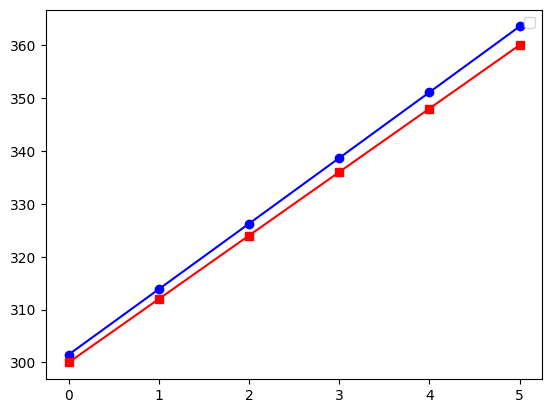

In [20]:
plt.plot(test_results2['Test Predictions'],color='blue',marker='o')
plt.plot(test_results2['Actuals'],color='red',marker='s')
plt.legend()